In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.io as sio
import sklearn
from sklearn.cluster import KMeans

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [10]:
def LoadData( path ):
    
    _mat = sio.loadmat( path )
    keys = list( _mat.keys() )
    dataset = _mat['fea']
    n = dataset.shape[0]
    init_labels = _mat['gnd']
    k = np.max( init_labels )
    
    img_mat = []
    
    #get the img_set
    for i in range(n):
        img = dataset[i].reshape(32,32)
        img_mat.append(img)
    
    #RET:
    #initial total information , the keys in dict, the img_set of dataset
    return dataset, keys, img_mat, k, init_labels

In [3]:
def trans( img_mat ):
    n = len( img_mat )
    img_set = []
    
    for i in range(n):
        nw = img_mat[i]
        nw = cv2.normalize( nw, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U )
        cv2.imwrite( 'F:\OpenCV3\Learn\COIL20/{}.png'.format(i), nw )
        #nw = cv2.cvColor( nw, cv2.COLOR_BGR2GRAY )
        nw = cv2.imread( 'F:\OpenCV3\Learn\COIL20/{}.png'.format(i) )
        img_set.append(nw)
    return img_set

In [4]:
#sth wrong
def K_Means( img_set, cluster_k, isrand = False ):
    
    sift = cv2.xfeatures2d.SIFT_create()
    features = []
    n = len(img_set)
    
    for i in range(n):
        
        nw_gray = img_set[i]
        kp, des = sift.detectAndCompute( nw_gray, None )
        
        if des is None:
            continue
            
        reshape_des = des.reshape(-1,1)
        features.append( reshape_des )
    
    input_fea = np.array( features )
    input_fea = np.concatenate( input_fea, axis = 0 )
    kmeans = KMeans( n_clusters = cluster_k, random_state = isrand ).fit( input_fea )
    return kmeans, features


In [11]:
dataURL = 'data/COIL20.mat'
dataset, keys, img_mat, cluster_k, init_labels = LoadData( dataURL )
img_set = trans( img_mat )
kmeans_result, features = K_Means( img_set, cluster_k )

In [15]:
def E_value( init_labels, lst_labels ):
    TP = TN = FP = FN = 0
    n = len(init_labels)
    for i in range(n):
        for j in range(i+1,n):
            if init_labels[i]==init_labels[j] and lst_labels[i]==lst_labels[j]:
                TP += 1
            if init_labels[i]!=init_labels[j] and lst_labels[i]!=lst_labels[j]:
                TN += 1
            if init_labels[i]!=init_labels[j] and lst_labels[i]==lst_labels[j]:
                FP += 1
            if init_labels[i]==init_labels[j] and lst_labels[i]!=lst_labels[j]:
                FN += 1
        
    ratio = ( TP + TN ) / ( TP + TN + FP + FN )
    return ratio

In [17]:
ratio = E_value( init_labels, kmeans_result.labels_ )
print(ratio)

0.7000656319975291


In [17]:
n = len(img_set)
dic = {}
for i in range(n):
    dic['{}'.format(kmeans_result.labels_[i])] = i
keyss = dic.keys()
valuess = dic.values()
print(valuess)

dict_values([1439, 1434, 1438, 1436, 1371, 1336, 1437, 1428, 1296, 1366, 1408, 1435, 1429, 1417, 1418, 1410, 1213, 851])


In [23]:
def check():
    print(n, m)
    for i in range(0,1440,72):
        plt.subplot( 4, 5, i//72 + 1 )
        plt.imshow(img_set[i])
        plt.axis('off')
    plt.show()

(1580032,)
20


1440 32.0


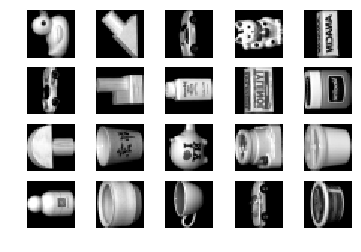

In [28]:
check()